In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed

# Introducción
La Optimización por Enjambre de Partículas (PSO, por sus siglas en inglés) es una técnica de optimización inspirada en el comportamiento social y la dinámica de enjambres en la naturaleza, como los patrones de vuelo de aves y peces. Esta metodología emula la inteligencia colectiva y la capacidad de adaptación de estos enjambres para resolver problemas de optimización complejos.

### Aplicaciones de la Optimización por Enjambre de Partículas

**La PSO se ha aplicado exitosamente en una amplia gama de campos, gracias a su flexibilidad y eficacia, incluyendo:**

- **Optimización de funciones**: Resolver problemas complejos de optimización matemática donde se busca el mínimo o máximo de una función.
- **Selección de características**: Identificar las características más significativas dentro de grandes conjuntos de datos, crucial en áreas como el reconocimiento de patrones y la minería de datos.
- **Optimización de redes neurales**: Ajustar los pesos y parámetros de redes neuronales para mejorar su rendimiento en tareas de aprendizaje automático.
- **Planificación y programación**: Asignación óptima de recursos en problemas de planificación y programación, como la programación de tareas y la gestión de proyectos.
- **Optimización de diseños de ingeniería**: Diseñar componentes o sistemas óptimos en ingeniería, abarcando desde la optimización de estructuras hasta el diseño de circuitos.

### Fundamentos en Optimización Heurística

La PSO pertenece a la categoría de algoritmos heurísticos debido a que se basa en reglas prácticas para explorar el espacio de soluciones de un problema, en lugar de garantizar encontrar la solución óptima global. La fortaleza de PSO reside en su simplicidad y en su capacidad para converger rápidamente hacia soluciones de alta calidad en problemas complejos y multidimensionales. Sin embargo, al ser un método heurístico, no puede asegurar la localización de la solución óptima global en todos los casos, especialmente en problemas con espacios de búsqueda extensos y complejos.

La PSO imita la conducta social y la colaboración dentro de un enjambre, donde cada "partícula" (un posible candidato a solución) se mueve en el espacio de búsqueda influenciada tanto por su experiencia personal como por la experiencia compartida del enjambre. Este movimiento se guía hacia áreas del espacio de búsqueda que han demostrado ser prometedoras, basándose en la calidad de las soluciones encontradas previamente. A través de este proceso colaborativo y dinámico, el enjambre converge hacia soluciones óptimas, equilibrando la exploración del espacio de búsqueda con la explotación de las soluciones conocidas.

# Función a Optimizar: Eggholder

**Forma General:**
$$
f(x_1,x_2) = -(x_2 + 47) \sin\left(\sqrt{\left| x_2 + \frac{x_1}{2} + 47\right|}\right) - x_1 \sin\left(\sqrt{\left|x_1 - (x_2 + 47)\right|}\right)
$$

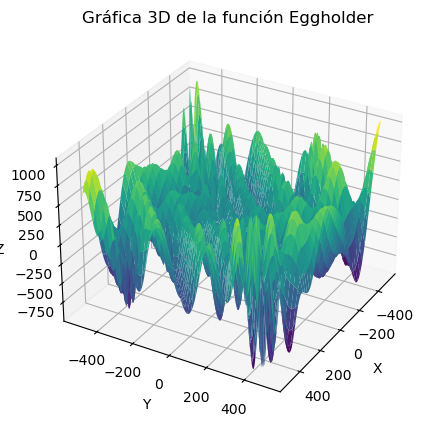

In [18]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

# Gráfica 3D
def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Gráfica 3D de la función Eggholder')
    plt.show()

plot_3d()

# Algoritmo de Optimización por Enjambre de Partículas

## Resolución de la Función Eggholder con PSO

El algoritmo PSO resuelve la función EggHolder inicializando un conjunto de partículas en el espacio de búsqueda, cada una con una posición que representa una posible solución. Cada partícula evalúa su posición actual usando la función EggHolder y retiene la ubicación de su mejor valor encontrado. Comparten también la mejor posición global con el enjambre. Las partículas se mueven en el espacio de soluciones influenciadas por su mejor posición personal y la global, ajustando sus velocidades con una combinación de "memoria" e "influencia social". Con el tiempo, se espera que converjan hacia la posición óptima, o una aproximación cercana, que minimiza el valor de la función EggHolder.

### Evolución de la Función de Desempeño

La gráfica de la evolución de la función de desempeño a lo largo de las iteraciones del algoritmo muestra cómo el valor de la función de desempeño disminuye con el tiempo, lo que indica que el algoritmo está encontrando soluciones cada vez mejores. Este algoritmo me ha sorprendido para bien porque ha encontrado la solución óptima en muy pocas iteraciones, sin embargo si se influye mucho por el número de partículas.

## Mejor Solución Encontrada

La mejor solución encontrada por el algoritmo durante esta ejecución es:

- Coordenadas: $x = 439.34034698$, $y = 453.83945389$
- Valor de la función Eggholder en estas coordenadas: $-935.3341566372592$

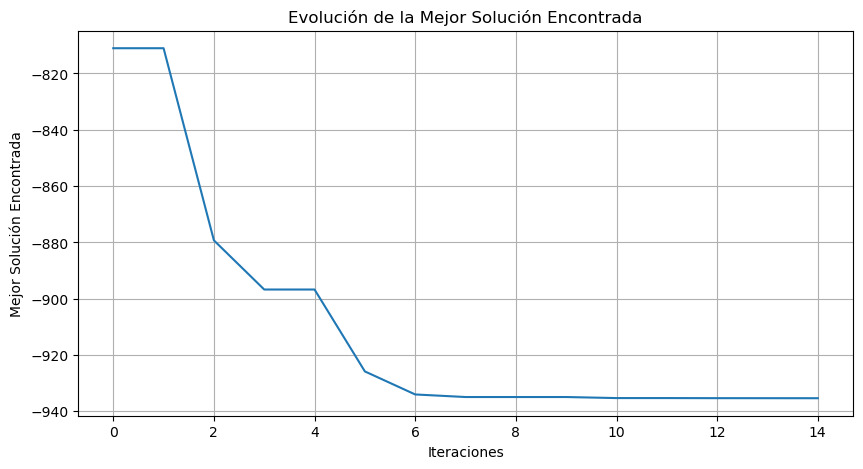

(array([439.34034698, 453.83945389]), -935.3341566372592)

In [17]:
# Definir los límites de la función
bounds = [(-512, 512), (-512, 512)]

# Parametros del PSO
n_particles = 100
n_iterations = 15
phi1_max = 0.5
phi2_max = 0.5
v_max = 100
w = 0.5  # Peso de la inercia

# Inicialización de las partículas
seed(1)  # Semilla para reproducibilidad
particles = np.array([np.array([random() * (bounds[0][1] - bounds[0][0]) + bounds[0][0],
                                random() * (bounds[1][1] - bounds[1][0]) + bounds[1][0]])
                      for _ in range(n_particles)])
velocities = np.zeros_like(particles)
pbest_positions = particles.copy()
pbest_scores = np.array([eggholder(p[0], p[1]) for p in particles])
gbest_position = pbest_positions[np.argmin(pbest_scores)]
gbest_score = np.min(pbest_scores)

# Lista para Guardar el Historial de las Mejores Soluciones encontradas
best_scores = []

# Algoritmo PSO
for t in range(n_iterations):
    for i in range(n_particles):
        # Actualizar la Velocidad de las Partículas
        r1, r2 = random(), random()
        velocities[i] = (w * velocities[i] +
                         phi1_max * r1 * (pbest_positions[i] - particles[i]) +
                         phi2_max * r2 * (gbest_position - particles[i]))
        # Aplicar los límtes de Velocidad
        velocities[i] = np.clip(velocities[i], -v_max, v_max)
        
        # Actualizar la Posición de las Partículas
        particles[i] += velocities[i]
        # Aplicar los limites 
        particles[i] = np.clip(particles[i], [b[0] for b in bounds], [b[1] for b in bounds])
        
        # Evaluar las partículas
        fitness = eggholder(particles[i][0], particles[i][1])
        
        # Actualizar el Mejor Personal
        if fitness < pbest_scores[i]:
            pbest_positions[i] = particles[i]
            pbest_scores[i] = fitness
            
        # Actualizar el Mejor Global
        if fitness < gbest_score:
            gbest_position = particles[i]
            gbest_score = fitness
            
    # Trackear la Evolución de la Mejor Solución Encontrada
    best_scores.append(gbest_score)

# Graficar la Evolución de la Mejor Solución Encontrada
plt.figure(figsize=(10, 5))
plt.plot(best_scores)
plt.xlabel('Iteraciones')
plt.ylabel('Mejor Solución Encontrada')
plt.title('Evolución de la Mejor Solución Encontrada')
plt.grid(True)
plt.show()

# Solución Final y Coordenadas
gbest_position, gbest_score

# Visualización de la Mejor Solución Encontrada

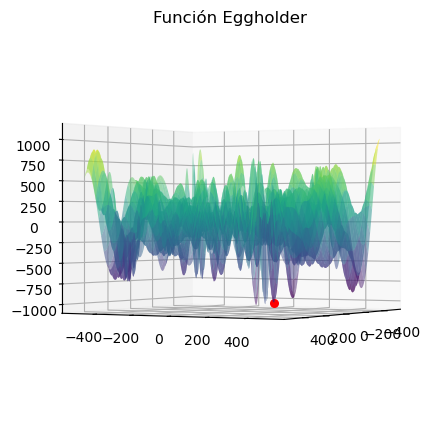

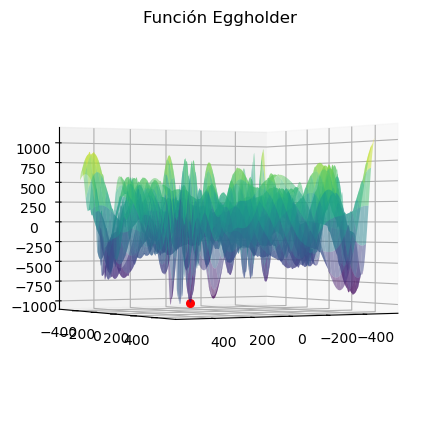

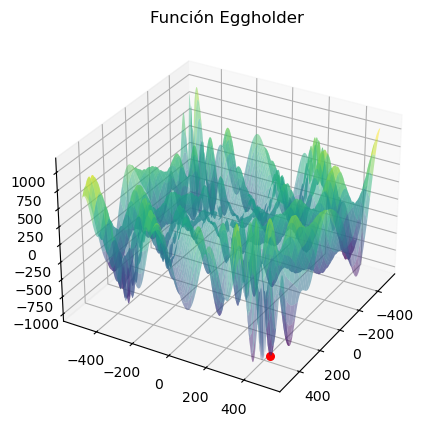

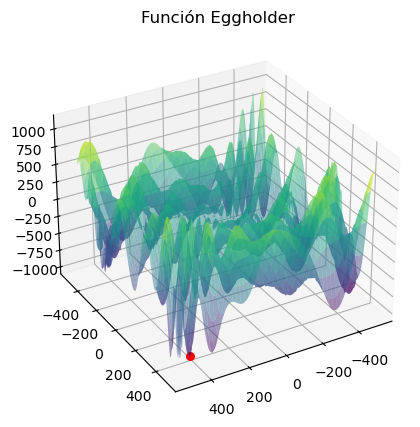

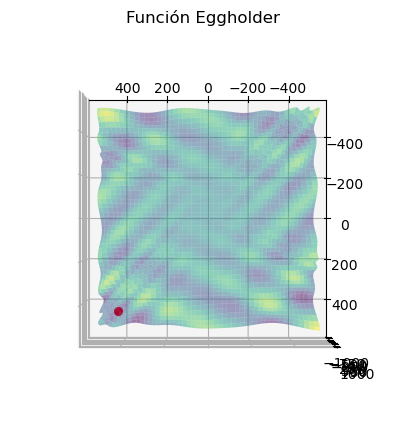

In [19]:
# Función Eggholder
def eggholder(x, y):
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Definición de la grilla
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
# Cálculo de la función Eggholder
Z = eggholder(X, Y)

def plot_3D(elev=0, azim=30):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none').set_alpha(0.5)
    ax.scatter( gbest_position[0], gbest_position[1], gbest_score, color='r', s=30, label='Mejor solución')
    ax.set_title('Función Eggholder')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

plot_3D()
plot_3D(0, 60)
plot_3D(30, 30)
plot_3D(30, 60)
plot_3D(90, 90)

# Conclusiones

### Ventajas de la Optimización por Enjambre de Partículas (PSO) en la Función EggHolder

1. **Simplicidad de Implementación:** PSO es conceptualmente más simple y más fácil de implementar en comparación con otros algoritmos, lo que facilita su aplicación en la función EggHolder.

2. **Eficiencia en Espacios Continuos:** El PSO es particularmente efectivo en espacios de búsqueda continuos como el de la función EggHolder, manejando las complejidades del paisaje de optimización de forma efectiva.

3. **Pocas Líneas de Código Necesarias:** La estructura del PSO permite que sea codificado con relativa brevedad, lo que se traduce en una rápida puesta en marcha para problemas como la función EggHolder.

4. **Buena Exploración del Espacio de Búsqueda:** El enfoque de movimiento y adaptación de las partículas permite una amplia exploración, aumentando las posibilidades de evitar mínimos locales y apuntando hacia el mínimo global de la función EggHolder.

### Desventajas de la Optimización por Enjambre de Partículas (PSO) en la Función EggHolder

1. **Dependencia de los Parámetros Iniciales:** El rendimiento de PSO es muy sensible a la elección de parámetros como la inercia y las constantes de aprendizaje, lo cual puede requerir ajustes y experimentación para la función EggHolder.

2. **Riesgo de Convergencia Prematura:** Si las partículas se estancan en mínimos locales, el algoritmo puede converger prematuramente antes de encontrar el mínimo global de la función EggHolder.

3. **Necesidad de Balance entre Exploración y Explotación:** El ajuste inadecuado entre la exploración del espacio de búsqueda y la explotación de las mejores soluciones encontradas puede llevar a resultados subóptimos en la función EggHolder.

En conclusión, la Optimización por Enjambre de Partículas es una herramienta robusta y competente para resolver problemas de optimización como la función EggHolder, ofreciendo una implementación sencilla y una eficiente exploración del espacio de soluciones. Su capacidad para ajustar dinámicamente la trayectoria de cada partícula hacia soluciones prometedoras la hace valiosa, aunque su dependencia de una buena elección de parámetros y la gestión del equilibrio entre exploración y explotación son aspectos críticos que influyen en su éxito.